# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [9]:
# Implementing Thompson Sampling
import random
N = 10000 # total number of rounds (users)
d = 10 # total number of armed bandits (ads)
ads_selected = [] # selected ads we selected at each round

# 1. At each round n, we consider two numbers for each ADi:
#   - N|1i(n): the number of times the ADi got reward 1 up to round n
#   - N|0i(n): the number of times the ADi got reqard 0 up to round n
numbers_of_rewards_1 = [0] * d # list of N|1
numbers_of_rewards_0 = [0] * d # list of N|0
total_reward = 0 # accumultae reward we got over time

# main loop interacting through the N rounds
for n in range(0, N):
  ad = 0 # ad selected at the n round
  max_random = 0 # max of random draws
  # second loop interacting through the d ads
  for i in range(0, d):
    # 2. for each ADi, we take a random draw from the Beta distribution
    #   FI(n) = BETA(N|1i(n) + 1, N|0i(n) + 1)
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    # 3. Select the AD that has the highest FI(n)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  # update the variables
  ads_selected.append(ad) # append the new selected ad to the list
  reward = dataset.values[n, ad] # reward of the ad
  # update number of rewards
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  # update accumulated total reward
  total_reward = total_reward + reward

print('Total reward: ' + str(total_reward))










Total reward: 2611


## Visualising the results - Histogram

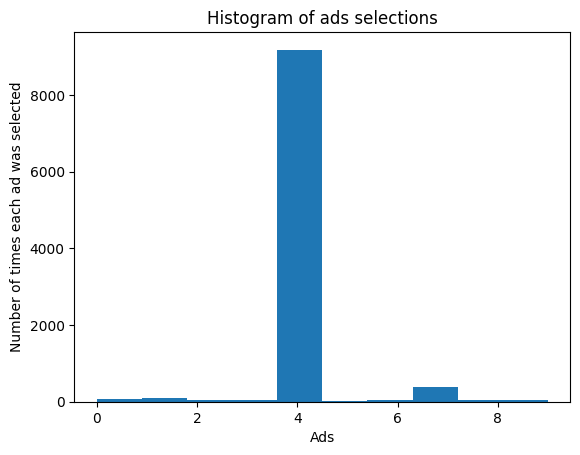

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()